# Analysis Bootstrap

This tutorial shows how to perform analysis after A/B test experiments using bootstrapping. This technique makes 
inference about a certain estimate (e.g. sample mean) for a certain population parameter (e.g. population mean) by 
resampling with replacement from the observed dataset. It does not make any assumption on the samples distribution.

Let's import first the tools needed.

In [1]:
import numpy as np
import pandas as pd
from abexp.core.analysis_frequentist import FrequentistAnalyzer
from abexp.visualization.analysis_plots import AnalysisPlot

## Simple bootstrap

Here we want to compare a specific metrics of the control group versus the treatment group (e.g. average revenue per 
user). We will perform bootstrapping on the kpi metrics (revenue) of each group.

In [2]:
# Generate random data for revenue control group
revenue_contr = np.random.randint(low=50, high=500, size=100)

# Generate random data for revenue treatment group
revenue_treat = np.random.randint(low=50, high=600, size=100)  

In [3]:
# Define the analyzer
analyzer = FrequentistAnalyzer()

In [4]:
# Define the aggregation function that will be applied on the sample
aggregation_func = np.mean

# other possibles aggregation functions might be:
#  - standard deviation = np.std, 
#  - sum                = np.sum
#  - median             = lambda x: np.median(x, axis=0)

Bootstrapping will generate a sequence of ``N`` values (where ``N`` is the number of repetitions). The bootstrap 
function returns a table with the median, 2.5 percentile and 97.5 percentile of this sequence.

In [5]:
# Perform bootstrapping on the control group
stats_contr = analyzer.bootstrap(revenue_contr, func=aggregation_func, rep=500)
stats_contr

median  2.5 percentile  97.5 percentile
  282.475         255.092         307.1285

In [6]:
# Perform bootstrapping on the treatment group
stats_treat = analyzer.bootstrap(revenue_treat, func=aggregation_func, rep=500)
stats_treat

median  2.5 percentile  97.5 percentile
   305.5         276.192         339.1205

In [7]:
# Define heights of the bars
bars = [stats_contr['median'], stats_treat['median']]

# Compute the error between median and percentiles
ci_contr = [stats_contr['2.5 percentile'], 
            stats_contr['97.5 percentile']]

ci_treat = [stats_treat['2.5 percentile'], 
            stats_treat['97.5 percentile']]

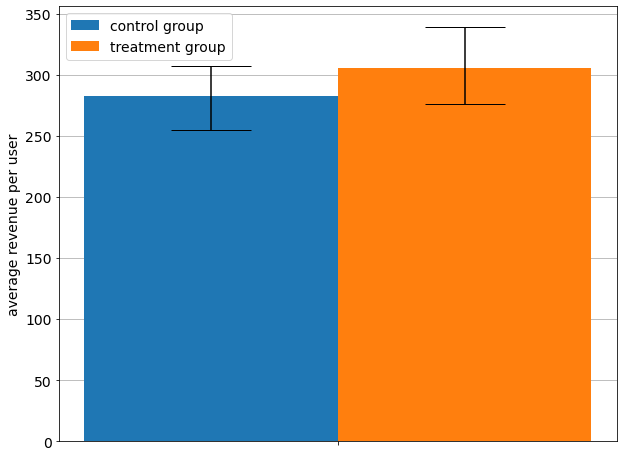

In [8]:
# Plot results with confidence interval
fig = AnalysisPlot.barplot(bars, [ci_contr, ci_treat], 
                           groupslabel=['control group', 'treatment group'], 
                           ylabel='average revenue per user', xlabel='')

In the barplot above we see that there is no difference between empirical means because the confidence intervals 
overlap. 

## Time series bootstrap

Here we want to compare a specific metrics of the control group versus the treatment group (e.g. average revenue per 
user) across time. We will perform bootstrapping on the kpi metrics (revenue) of each group per each day. Note that the 
bootstrap function maintains the correlation across days.

In [9]:
# Generate random data for revenue control group
revenue_contr_ts = pd.DataFrame({'day1': np.random.randint(low=1, high=500, size=1000),
                                 'day2': np.random.randint(low=1, high=500, size=1000),
                                 'day3': np.random.randint(low=1, high=500, size=1000),
                                 'day4': np.random.randint(low=1, high=500, size=1000),
                                 'day5': np.random.randint(low=1, high=500, size=1000),
                                 'day6': np.random.randint(low=1, high=500, size=1000),
                                 'day7': np.random.randint(low=1, high=500, size=1000)})

# Generate random data for revenue treatment group
revenue_treat_ts = pd.DataFrame({'day1': np.random.randint(low=1, high=600, size=1000),
                                 'day2': np.random.randint(low=1, high=600, size=1000),
                                 'day3': np.random.randint(low=1, high=600, size=1000),
                                 'day4': np.random.randint(low=1, high=600, size=1000),
                                 'day5': np.random.randint(low=1, high=600, size=1000),
                                 'day6': np.random.randint(low=1, high=600, size=1000),
                                 'day7': np.random.randint(low=1, high=600, size=1000)})

In [10]:
# Perform bootstrapping on the control group
stats_contr_ts = analyzer.bootstrap(revenue_contr_ts, func=aggregation_func, rep=500)
stats_contr_ts

median  2.5 percentile  97.5 percentile
day1  246.6630      237.597475       255.912150
day2  248.0410      239.164575       256.451925
day3  250.4535      241.068275       259.431525
day4  252.0625      244.145850       261.326350
day5  246.4465      237.647800       255.376150
day6  252.0445      243.933075       261.501475
day7  249.0605      240.451950       257.918600

In [11]:
# Perform bootstrapping on the treatment group
stats_treat_ts = analyzer.bootstrap(revenue_treat_ts, func=aggregation_func, rep=500)
stats_treat_ts

median  2.5 percentile  97.5 percentile
day1  305.8540      295.303525       315.689025
day2  297.1785      287.122225       308.437950
day3  311.1690      300.329400       322.258075
day4  297.0245      286.180500       307.432525
day5  302.7850      292.530300       313.642875
day6  300.4425      289.563675       311.556775
day7  299.9155      288.822375       310.642600

__Plot results with confidence intervals__

In [12]:
# Define heights of the bars
y = [stats_contr_ts['median'], stats_treat_ts['median']]

# Compute the error between median and percentiles
ci_treat_ts = [stats_treat_ts['median'] - stats_treat_ts['2.5 percentile'],
               stats_treat_ts['97.5 percentile'] - stats_treat_ts['median']]
ci_contr_ts = [stats_contr_ts['median'] - stats_contr_ts['2.5 percentile'],
               stats_contr_ts['97.5 percentile'] - stats_contr_ts['median']]

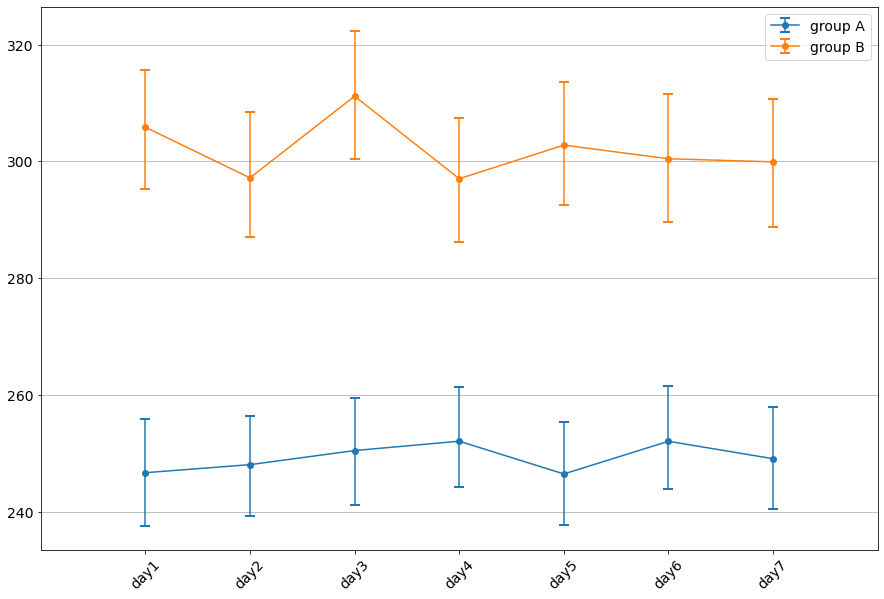

In [13]:
fig = AnalysisPlot.timeseries_plot(y, [ci_contr_ts, ci_treat_ts])